In [1]:
import torch

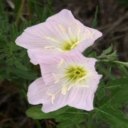

In [4]:
import torchvision
import torch
from PIL import Image
# python 3.12.8
# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("../Module 1/flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("../Module 1/flowers", "test", transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_image(train_dataset[4][0])

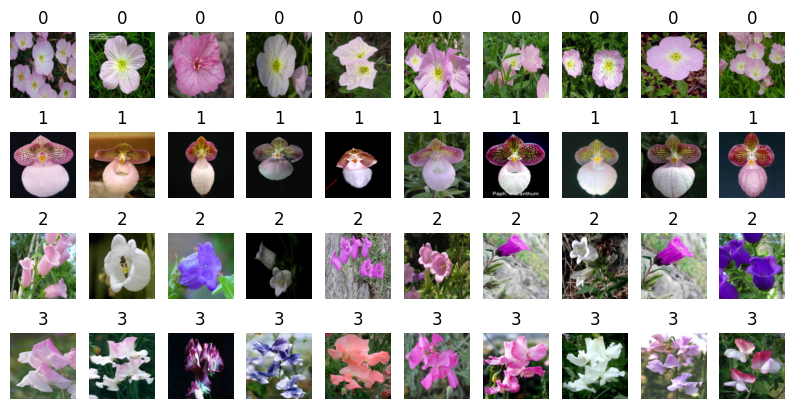

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(10,5))
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)
    ax[i // 10, i % 10].axis('off')


In [11]:
type(train_dataset[0][0])
# the first one is tensor, the second value is label

torch.Tensor

In [12]:
train_dataset[0][0].shape

torch.Size([3, 128, 128])

In [13]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_images.shape
# 1020 images, 3 dimension (which is image), size 128 x 128

torch.Size([1020, 3, 128, 128])

In [15]:
train_labels = torch.tensor([label for _, label in train_dataset])
train_labels.shape
# 1020 labels

torch.Size([1020])

In [33]:
train_images_01 = train_images[train_labels <= 1]
train_labels_01 = train_labels[train_labels <= 1]

model = torch.nn.Linear(128 * 128 * 3, 1)
# model is Linear model take all pixels in the image which is 128 * 128 * 3, we regress to single value
loss = torch.nn.MSELoss()
# loss function, mean square e loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0)
# call this to get gradient descent step, lr = learning rate

# train epoch
for epoch in range(100):
    # COmpute model predictions
    pred_label = model(train_images_01.view(-1, 128 * 128 * 3))
    # predict label
    loss_val = loss(pred_label.view(-1), train_labels_01.float())
    # compute the loss of predicted labels, with the tensor of the size of number of imgeas time one
    # train label must be float

    ## Comnpute gradients and step the optimizer
    optimizer.zero_grad() # take the computational graph and make sure all the gradient values are set to zero,
    # reset the gradietn values to zero
    loss_val.backward() # backward call will not override gradient terms but only add gradient to what already in there
    # then add, so the gradient will be correct gradients
    optimizer.step() #optimize the objective
    print(f"Epoch {epoch}, loss {loss_val.item()}")

    ## this is the training look like
    ## first we prepare the data, we took the entire data set
    ## we only want to train on the label 0 and 1
    ## we set up the model
    ## we set up the loss function
    ## we create optimizer
    ## in this case is gradient descent or stochastic gradient descent
    ## optimizer nees one parameter which is what it acctually optimizing which is the model parameters
    ## we need the learning rate
    ## iterate over training
    ## iteration itself, we take the model, we predict the value from the model
    ## we compute the loss, which show how far off this value is from the predicted from the predicted from
    ## we use the optimizer to take the gradient step




Epoch 0, loss 0.46690306067466736
Epoch 1, loss 0.38895660638809204
Epoch 2, loss 0.3286259174346924
Epoch 3, loss 0.2811598777770996
Epoch 4, loss 0.24340815842151642
Epoch 5, loss 0.21314558386802673
Epoch 6, loss 0.18872961401939392
Epoch 7, loss 0.16891303658485413
Epoch 8, loss 0.1527320146560669
Epoch 9, loss 0.13943472504615784
Epoch 10, loss 0.12843067944049835
Epoch 11, loss 0.11925478279590607
Epoch 12, loss 0.11153978109359741
Epoch 13, loss 0.10499529540538788
Epoch 14, loss 0.0993913859128952
Epoch 15, loss 0.094545878469944
Epoch 16, loss 0.09031414985656738
Epoch 17, loss 0.08658139407634735
Epoch 18, loss 0.08325628191232681
Epoch 19, loss 0.08026616275310516
Epoch 20, loss 0.07755297422409058
Epoch 21, loss 0.0750703364610672
Epoch 22, loss 0.07278113067150116
Epoch 23, loss 0.07065550237894058
Epoch 24, loss 0.0686694011092186
Epoch 25, loss 0.06680341064929962
Epoch 26, loss 0.06504176557064056
Epoch 27, loss 0.06337158381938934
Epoch 28, loss 0.06178231164813042
Epo

In [51]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_labels = torch.tensor([label for _, label in test_dataset])

In [53]:
test_images_01 = test_images[test_labels <= 1]
test_labels_01 = test_labels[test_labels <= 1]
pred_label = model(test_images_01.view(-1, 128 * 128 * 3))
print(loss(pred_label.view(-1), test_labels_01.float()).item())

0.263060063123703
